<h1><center>Tensorflow 8</center></h1>
<h2><center>Classification</center></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit_psspl/environments/

In [2]:
diabetes = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


1 - not diabetes
0 - diabetes

In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
col_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[col_to_norm] = diabetes[col_to_norm].apply(lambda x : (x - x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
num_preg =  tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc =  tf.feature_column.numeric_column('Glucose_concentration')
dias_press =  tf.feature_column.numeric_column('Blood_pressure')
tricep =  tf.feature_column.numeric_column('Triceps')
insulin =  tf.feature_column.numeric_column('Insulin')
bmi =  tf.feature_column.numeric_column('BMI')
diabetes_pedigree =  tf.feature_column.numeric_column('Pedigree')
age =  tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [11]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

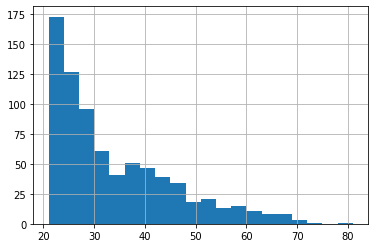

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [15]:
# train test split

In [16]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpldtcaze3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbfe59c0240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
model.train(input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpldtcaze3/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 489.286
INFO:tensorflow:loss = 5.7034883, step = 101 (0.206 sec)
INFO:tensorflow:global_step/sec: 615.73
INFO:tensorflow:loss = 5.0503874, step = 201 (0.163 sec)
INFO:tensorflow:global_step/sec: 6

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-14T10:59:08Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpldtcaze3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-14-10:59:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.79814816, auc_precision_recall = 0.6463448, average_loss = 0.52674174, global_step = 1000, label/mean = 0.35064936, loss = 5.0698895, precision = 0.6666667, prediction/mean = 0.36124817, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpldtcaze3/model.ckpt-1000


In [25]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79814816,
 'auc_precision_recall': 0.6463448,
 'average_loss': 0.52674174,
 'label/mean': 0.35064936,
 'loss': 5.0698895,
 'precision': 0.6666667,
 'prediction/mean': 0.36124817,
 'recall': 0.54320985,
 'global_step': 1000}

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
predictions = model.predict(pred_input_func)

In [28]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpldtcaze3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.00299108], dtype=float32),
  'logistic': array([0.50074774], dtype=float32),
  'probabilities': array([0.49925226, 0.5007478 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.50240433], dtype=float32),
  'logistic': array([0.62302417], dtype=float32),
  'probabilities': array([0.3769758 , 0.62302417], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.46510148], dtype=float32),
  'logistic': array([0.3857763], dtype=float32),
  'probabilities': array([0.6142237 , 0.38577634], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.8055811], dtype=float32),
  'logistic': array([0.30883294], dtype=float32),
  'probabilities': array([0.6911671 , 0.30883294], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.864263], dtype=float32),
  'logistic':

In [29]:
y_test

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Class, Length: 231, dtype: int64

In [30]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpesludakg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbfe4abf048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpesludakg/model.ckpt.
INFO:tensorflow:loss = 7.2551656, step = 1
INFO:tensorflow:global_step/sec: 508.714
INFO:tensorflow:loss = 5.2217884, step = 101 (0.204 sec)
INFO:tensorflow:global_step/sec: 516.256
INFO:tensorflow:loss = 4.773027, step = 201 (0.191 sec)
INFO:tensorflow:global_step/sec: 633.088
INFO:tensorflow:loss = 7.3879614, step = 301 (0.157 sec)
INFO:tensorflow:global_step/sec: 627.117
INFO:tensorflow:loss = 4.7754273, step = 401 (0.159 sec)
INFO:tensorflow:global_step/sec: 624.828
INFO:tensorflow:loss = 4.6529512, step = 501 (0.161 sec)
INFO:tensorflow:global_step/sec: 630.154
INFO:tensorflow:loss = 3.347223, step = 601 (0.158 sec)
INFO:tensorflow:global_step/sec: 646.66
INFO:tensorflow:los

In [32]:
eval_input_func =tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [33]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-14T11:04:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpesludakg/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-14-11:04:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7748918, accuracy_baseline = 0.64935064, auc = 0.838642, auc_precision_recall = 0.7093982, average_loss = 0.47165915, global_step = 1000, label/mean = 0.35064936, loss = 4.539719, precision = 0.67058825, prediction/mean = 0.37619966, recall = 0.7037037
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpesludakg/model.ckpt-1000


In [34]:
results

{'accuracy': 0.7748918,
 'accuracy_baseline': 0.64935064,
 'auc': 0.838642,
 'auc_precision_recall': 0.7093982,
 'average_loss': 0.47165915,
 'label/mean': 0.35064936,
 'loss': 4.539719,
 'precision': 0.67058825,
 'prediction/mean': 0.37619966,
 'recall': 0.7037037,
 'global_step': 1000}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpldtcaze3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.00299108], dtype=float32),
  'logistic': array([0.50074774], dtype=float32),
  'probabilities': array([0.49925226, 0.5007478 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.50240433], dtype=float32),
  'logistic': array([0.62302417], dtype=float32),
  'probabilities': array([0.3769758 , 0.62302417], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.46510148], dtype=float32),
  'logistic': array([0.3857763], dtype=float32),
  'probabilities': array([0.6142237 , 0.38577634], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.8055811], dtype=float32),
  'logistic': array([0.30883294], dtype=float32),
  'probabilities': array([0.6911671 , 0.30883294], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.864263], dtype=float32),
  'logistic':